# Loading Package

In [28]:
## Loading Libraries and Modules
import pandas as pd
import numpy as np
import ast
import joblib
from collections import Counter

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.tree import plot_tree

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# 1. Reviewing Dataset

In [3]:
with open('yelp_academic_dataset_business.json', 'r', encoding='utf-8') as f:
    first_line = f.readline()
    print(first_line)

{"business_id":"Pns2l4eNsfO8kk83dixA6A","name":"Abby Rappoport, LAC, CMQ","address":"1616 Chapala St, Ste 2","city":"Santa Barbara","state":"CA","postal_code":"93101","latitude":34.4266787,"longitude":-119.7111968,"stars":5.0,"review_count":7,"is_open":0,"attributes":{"ByAppointmentOnly":"True"},"categories":"Doctors, Traditional Chinese Medicine, Naturopathic\/Holistic, Acupuncture, Health & Medical, Nutritionists","hours":null}



In [4]:
with open('yelp_academic_dataset_checkin.json', 'r', encoding='utf-8') as f:
    first_line = f.readline()
    print(first_line)

{"business_id":"---kPU91CF4Lq2-WlRu9Lw","date":"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020-07-24 22:42:27, 2020-10-24 21:36:13, 2020-12-09 21:23:33, 2021-01-20 17:34:57, 2021-04-30 21:02:03, 2021-05-25 21:16:54, 2021-08-06 21:08:08, 2021-10-02 15:15:42, 2021-11-11 16:23:50"}



In [95]:
with open('yelp_academic_dataset_tip.json', 'r', encoding='utf-8') as f:
    first_line = f.readline()
    print(first_line)

{"user_id":"AGNUgVwnZUey3gcPCJ76iw","business_id":"3uLgwr0qeCNMjKenHJwPGQ","text":"Avengers time with the ladies.","date":"2012-05-18 02:17:21","compliment_count":0}



In [96]:
with open('yelp_academic_dataset_user.json', 'r', encoding='utf-8') as f:
    first_line = f.readline()
    print(first_line)

{"user_id":"qVc8ODYU5SZjKXVBgXdI7w","name":"Walker","review_count":585,"yelping_since":"2007-01-25 16:47:26","useful":7217,"funny":1259,"cool":5994,"elite":"2007","friends":"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA, EjlCGf14tYMPJ0rsrL703w, 7OagHIAKx2Rm9z3CQ0OmvA, uZoFvKs0dahfffIqHQf1eA, TW7-U8Y_SYsAX91Ol5LlfA, 6EDA76lfkaTyOeuxkg0Fmw, MsTKApUX1VF2Mv9jpUIG5g, Rq4TAwX8vj0Ccc3Pt0mJ5g, P77zKKIP9xyakKLRutvdAQ, pOqaU6X1xyWUoYJJdoqbBw, 1aU0r7X2luo9P8hfSpq6ng, 7XDyuBY0mhLsaGqjquh8rw, KrnJZsROH6jsiCN_RHG_8Q, 48zQrAJNOqcKJJgqU5WzbQ, 48wN4GpyJ7hPy4uuwpGFmw, z8zzFMKCnavBY5_-_vzi9w, BemKKkZBBmu9GupEwKBj9g, vVS0rY7uZ2UZ6bdsDzSPIQ, hc6-o0VhNPw3qR3Pv7Knmg, 2AOUvDvG7rvAX1hLI5QZKA, dKzMVnYh_tvIQbDm6pTlRA, ACHQbmN7OMTY6PFz5Sl4_g, 8hqS8Wul46dt370JVRA83Q, TMLVzNYs-zwwREudyvI08A, 36LgEtwt6ROhrCtuPjfRmQ, -f6amuvfIVS7VX65BqZ6pQ, kCjFwGXHxUTaJ23p70j86w, d9J7e2uo-a0S0XMuw1CS-A, dbrGVOcscXUQjQGi_0bnaQ, a_luWCTl-TLAgvsgfn8dfw, -cnGMlaftdo8HGVrQwKE3Q, p2ww1kRTv0z9dT3gZYcDkg, 3gE3_MDUsCg-Tay4t1R5nA, uJ2LwqzRgB

In [97]:
with open('yelp_academic_dataset_review.json', 'r', encoding='utf-8') as f:
    first_line = f.readline()
    print(first_line)

{"review_id":"KU_O5udG6zpxOg-VcAEodg","user_id":"mh_-eMZ6K5RLWhZyISBhwA","business_id":"XQfwVwDr-v0ZS3_CbbE5Xw","stars":3.0,"useful":0,"funny":0,"cool":0,"text":"If you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. We have tried it multiple times, because I want to like it! I have been to it's other locations in NJ and never had a bad experience. \n\nThe food is good, but it takes a very long time to come out. The waitstaff is very young, but usually pleasant. We have just had too many experiences where we spent way too long waiting. We usually opt for another diner or restaurant on the weekends, in order to be done quicker.","date":"2018-07-07 22:09:11"}



# 2. Loading Datasets

In [5]:
# business
columns_needed = ['business_id', 'categories', 'stars', 'review_count', 'attributes']
chunks = pd.read_json('yelp_academic_dataset_business.json', lines=True, chunksize=10000)
selected_data = []
for chunk in chunks:
    selected_chunk = chunk[columns_needed]
    selected_data.append(selected_chunk)
business_core = pd.concat(selected_data, ignore_index=True)
print(business_core.columns.tolist())

['business_id', 'categories', 'stars', 'review_count', 'attributes']


In [6]:
# review
columns_needed = ['user_id', 'business_id', 'stars', 'date']
chunks = pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize=100000)
selected_data = []
for chunk in chunks:
    selected_chunk = chunk[columns_needed]
    selected_data.append(selected_chunk)
review_core = pd.concat(selected_data, ignore_index=True)
print(review_core.columns.tolist())

['user_id', 'business_id', 'stars', 'date']


In [7]:
# user
chunks = pd.read_json('yelp_academic_dataset_user.json', lines=True, chunksize=100000)
selected_data = []
for chunk in chunks:
    selected_chunk = chunk.drop(columns=['name', 'average_stars'])
    selected_data.append(selected_chunk)
user_core = pd.concat(selected_data, ignore_index=True)
print(user_core.columns.tolist())

['user_id', 'review_count', 'yelping_since', 'useful', 'funny', 'cool', 'elite', 'friends', 'fans', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']


In [8]:
# count friends
def count_friends_str(x):
    if pd.isna(x) or x.strip() == "" or x.lower() == "none":
        return 0
    return len([f.strip() for f in x.split(",") if f.strip()])
user_core["friend_count"] = user_core["friends"].apply(count_friends_str)
user_core = user_core.drop(columns=['friends'])
print(user_core['friend_count'].describe())

count    1.987897e+06
mean     5.293306e+01
std      1.466023e+02
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      4.600000e+01
max      1.499500e+04
Name: friend_count, dtype: float64


In [9]:
# count elite
user_core["elite_count"] = user_core["elite"].apply(count_friends_str)
user_core = user_core.drop(columns=['elite'])
print(user_core['elite_count'].describe())

count    1.987897e+06
mean     1.914063e-01
std      1.054780e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.700000e+01
Name: elite_count, dtype: float64


In [10]:
# 'yelping_since' datetime
user_core['yelping_since'] = pd.to_datetime(user_core['yelping_since'], errors='coerce')

In [11]:
# merge vote
vote_cols = ['useful', 'funny', 'cool']
user_core['vote'] = user_core[vote_cols].sum(axis=1)

# merge compliment
compliment_cols = [c for c in user_core.columns if c.startswith('compliment_')]
user_core['compliment'] = user_core[compliment_cols].sum(axis=1)

# drop original columns
drop_cols = vote_cols + compliment_cols
user_core = user_core.drop(columns=drop_cols)

print(user_core.columns.tolist())
print(user_core.shape)

['user_id', 'review_count', 'yelping_since', 'fans', 'friend_count', 'elite_count', 'vote', 'compliment']
(1987897, 8)


In [12]:
# merge
dat = review_core.merge(user_core, on='user_id', how='left')
dat = dat.merge(business_core, on='business_id', how='left')
print(dat.columns.tolist())

['user_id', 'business_id', 'stars_x', 'date', 'review_count_x', 'yelping_since', 'fans', 'friend_count', 'elite_count', 'vote', 'compliment', 'categories', 'stars_y', 'review_count_y', 'attributes']


In [13]:
# rename
dat.rename(columns={
    'stars_x': 'star_user',  # review_core 的评分
    'stars_y': 'star_bus',   # business_core 的平均评分
    'review_count_x': 'review_count_bus',
    'review_count_y': 'review_count_user'
}, inplace=True)
print(dat.columns.tolist())

['user_id', 'business_id', 'star_user', 'date', 'review_count_bus', 'yelping_since', 'fans', 'friend_count', 'elite_count', 'vote', 'compliment', 'categories', 'star_bus', 'review_count_user', 'attributes']


In [14]:
# sampling: 10%
dat['year'] = pd.to_datetime(dat['date']).dt.year
dff = dat[dat['year'].isin([2020, 2021, 2022])]
dff.drop(columns=['year'])

dfs = (dff.groupby('star_user', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True))
print(dfs.shape)

(120441, 16)


/var/folders/tq/h1v27n6j66s05lq52_nhqd8h0000gn/T/ipykernel_31870/2173188772.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  dfs = (dff.groupby('star_user', group_keys=False).apply(lambda x: x.sample(frac=0.1, random_state=42)).reset_index(drop=True))


In [15]:
print(dfs.columns.tolist())

['user_id', 'business_id', 'star_user', 'date', 'review_count_bus', 'yelping_since', 'fans', 'friend_count', 'elite_count', 'vote', 'compliment', 'categories', 'star_bus', 'review_count_user', 'attributes', 'year']


# 3. Data Analysis I

In [16]:
print(dfs.dtypes)

user_id                      object
business_id                  object
star_user                     int64
date                 datetime64[ns]
review_count_bus            float64
yelping_since        datetime64[ns]
fans                        float64
friend_count                float64
elite_count                 float64
vote                        float64
compliment                  float64
categories                   object
star_bus                    float64
review_count_user             int64
attributes                   object
year                          int32
dtype: object


## 1. Missing Value

In [17]:
dfs.isnull().sum()

user_id                 0
business_id             0
star_user               0
date                    0
review_count_bus        3
yelping_since           3
fans                    3
friend_count            3
elite_count             3
vote                    3
compliment              3
categories             12
star_bus                0
review_count_user       0
attributes           4596
year                    0
dtype: int64

In [18]:
# number columns fill na with 0
num_cols = ['review_count_bus', 'fans', 'friend_count', 'elite_count', 'vote', 'compliment']
dfs[num_cols] = dfs[num_cols].fillna(0)

# categories fill na with "Unknown"
dfs['categories'].fillna("Unknown", inplace=True)

# attributes fill na with space dict
dfs['attributes'].fillna({}, inplace=True)

print(dfs.head())

                  user_id             business_id  star_user  \
0  SjusTumfvm69Qu1j-o0D3g  WngZHmm_sCJeNCPHVj2bdw          1   
1  fY3o3icZKFAYj6zcj4EHUg  z5GlwQqwr4H8ruCjpnE_BA          1   
2  xAV8XItZyjqQWYdQK3GJww  Amkmm2uIHBe1QX1A98JpTA          1   
3  -YgJHZgYAKi0tIvlysqkiw  1fy9fS3UH2k4TfQcryNKkA          1   
4  e9tm0ujZz5qm89vsqntm3A  dipUMaStsnO-RhnqJpVaCA          1   

                 date  review_count_bus       yelping_since  fans  \
0 2020-07-23 04:03:06               2.0 2020-07-23 04:02:58   0.0   
1 2020-08-28 22:02:28              21.0 2012-11-08 04:18:44   0.0   
2 2020-08-22 15:44:12              19.0 2016-04-22 16:54:27   0.0   
3 2021-04-15 21:35:22               1.0 2021-04-15 21:35:13   0.0   
4 2020-06-29 04:23:38               1.0 2020-06-29 04:23:36   0.0   

   friend_count  elite_count  vote  compliment  \
0           0.0          0.0   0.0         0.0   
1           0.0          0.0   7.0         1.0   
2           1.0          0.0  28.0         0.0   


/var/folders/tq/h1v27n6j66s05lq52_nhqd8h0000gn/T/ipykernel_31870/414326074.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfs['categories'].fillna("Unknown", inplace=True)
/var/folders/tq/h1v27n6j66s05lq52_nhqd8h0000gn/T/ipykernel_31870/414326074.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

## 2. Feature Distribution

In [19]:
print(dfs.columns.tolist())

['user_id', 'business_id', 'star_user', 'date', 'review_count_bus', 'yelping_since', 'fans', 'friend_count', 'elite_count', 'vote', 'compliment', 'categories', 'star_bus', 'review_count_user', 'attributes', 'year']


### 1. Numeric

In [20]:
print(dfs[['star_user', 'star_bus', 'review_count_user', 'review_count_bus', 'fans', 'friend_count', 'vote', 'compliment', 'elite_count']].describe())

           star_user       star_bus  review_count_user  review_count_bus  \
count  120441.000000  120441.000000      120441.000000     120441.000000   
mean        3.740603       3.814884         290.675883         89.762340   
std         1.607056       0.815938         623.338580        321.745812   
min         1.000000       1.000000           5.000000          0.000000   
25%         2.000000       3.500000          34.000000          5.000000   
50%         5.000000       4.000000         103.000000         16.000000   
75%         5.000000       4.500000         286.000000         63.000000   
max         5.000000       5.000000        7568.000000      17473.000000   

                fans   friend_count           vote     compliment  \
count  120441.000000  120441.000000  120441.000000  120441.000000   
mean        8.920990      99.652834     704.868267     106.933652   
std        69.167151     346.361392    7921.065206    1194.378640   
min         0.000000       0.000000    

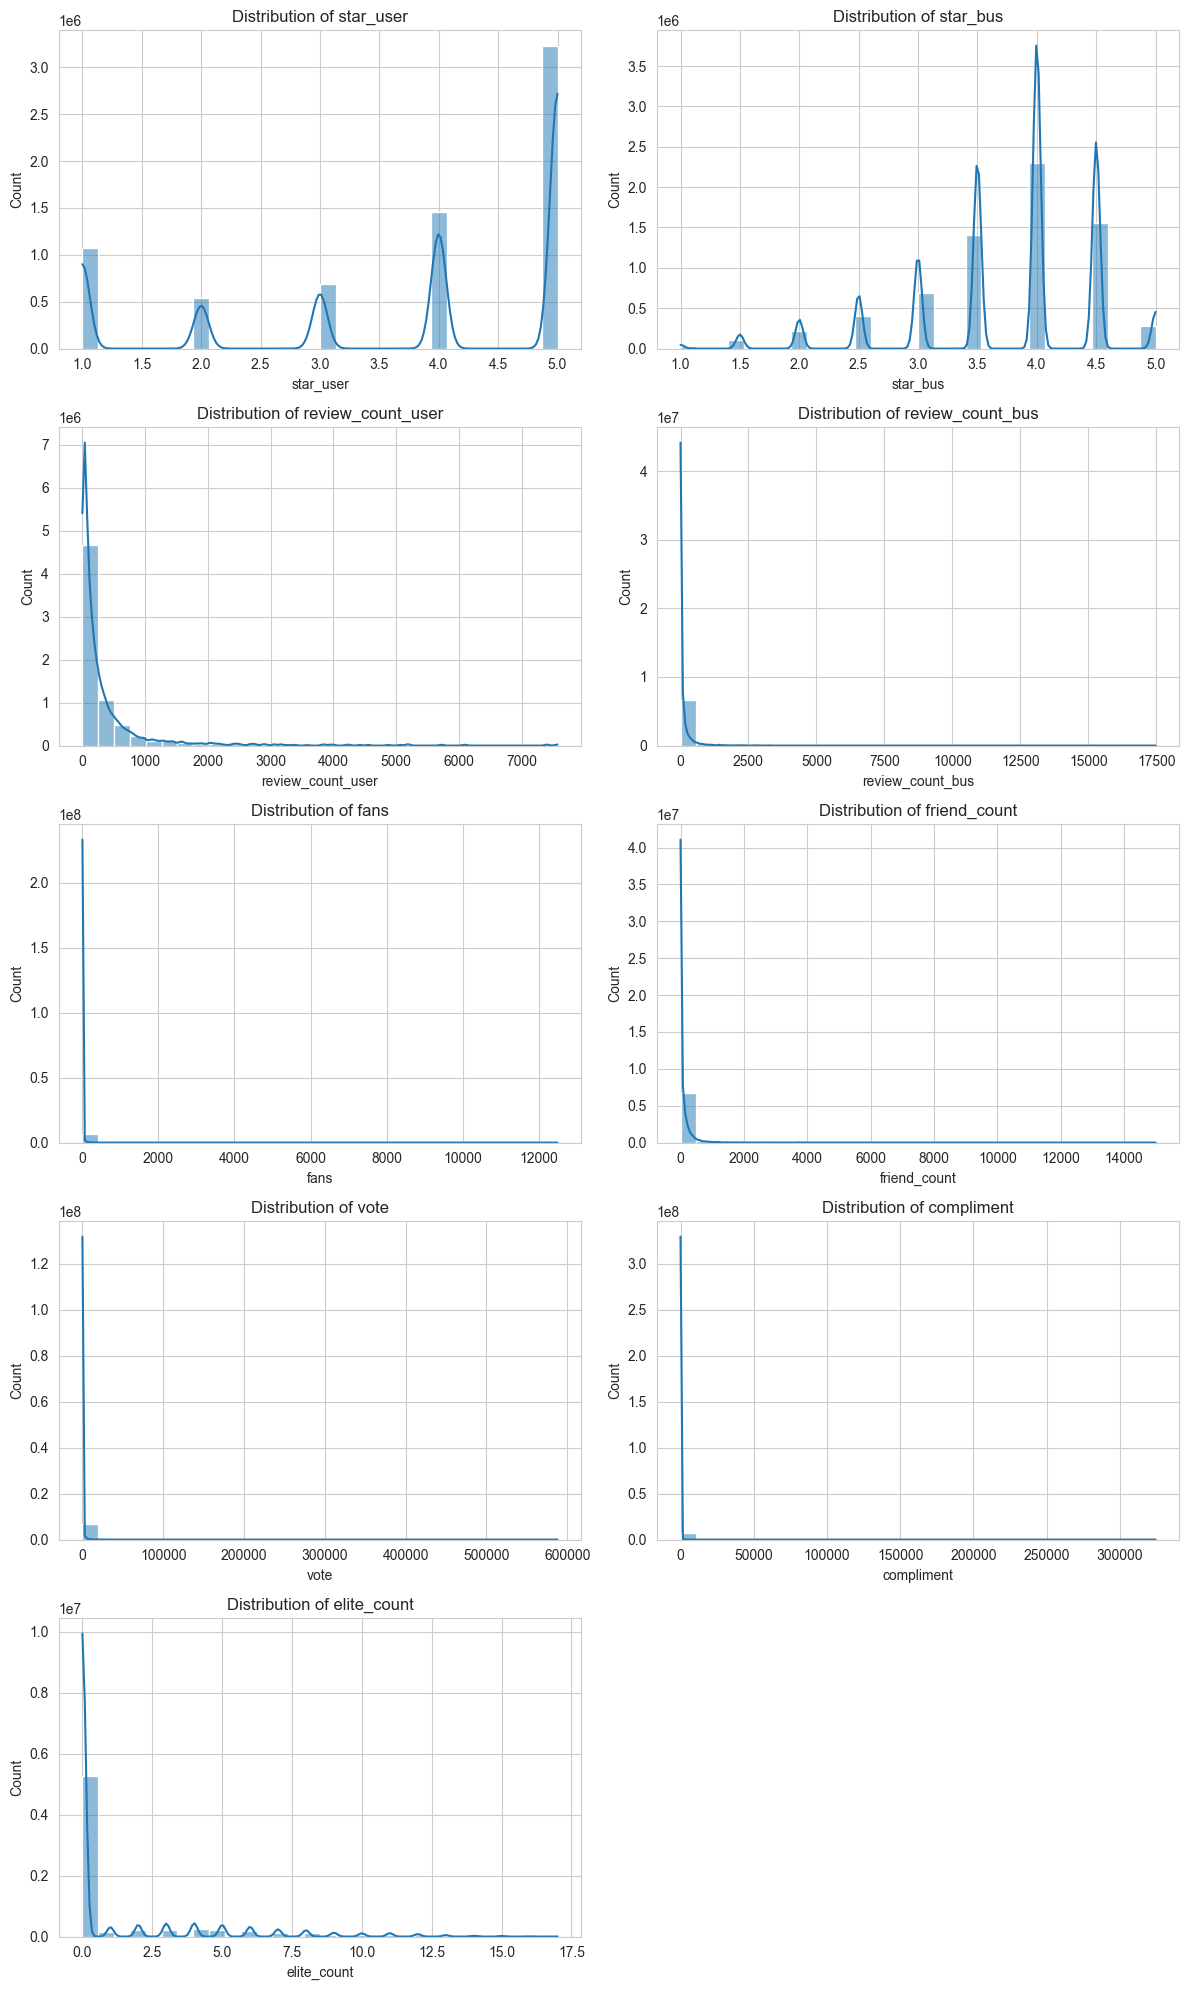

In [29]:
cols = ['star_user', 'star_bus', 'review_count_user', 'review_count_bus', 'fans', 'friend_count', 'vote', 'compliment', 'elite_count']
fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.flatten()
for i, col in enumerate(cols):
    sns.histplot(dat[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### 2. Categorical

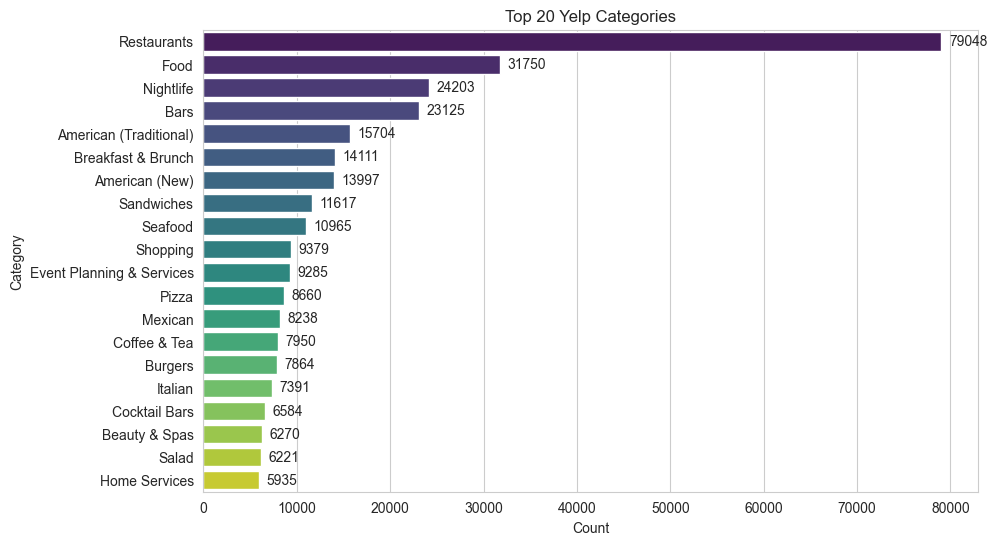

In [30]:
# Top 20 categories
flat_categories = [cat.strip() for x in dfs['categories'] for cat in x.split(',')]
counter = Counter(flat_categories)

top20 = counter.most_common(20)
top20_labels = [x[0] for x in top20]
top20_counts = [x[1] for x in top20]

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top20_counts, y=top20_labels, hue=top20_labels, palette='viridis')
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("Top 20 Yelp Categories")

# data label
for i, count in enumerate(top20_counts):
    ax.text(count + max(top20_counts)*0.01, i, str(count), va='center')

plt.show()

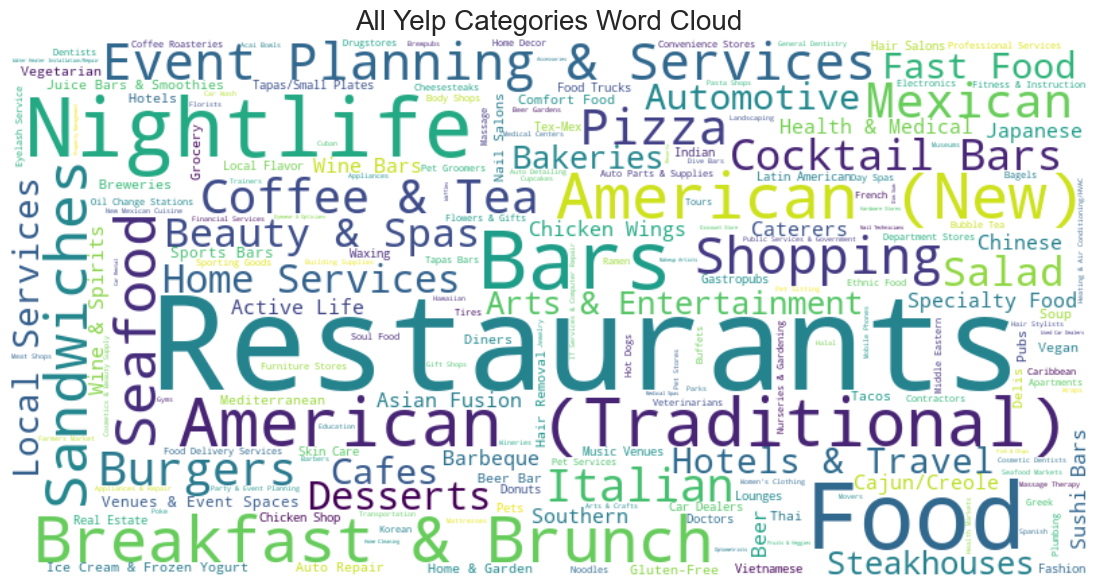

In [37]:
# wordcloud(all categories)
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(counter)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("All Yelp Categories Word Cloud", fontsize=20)
plt.show()

### 3. Dictionary

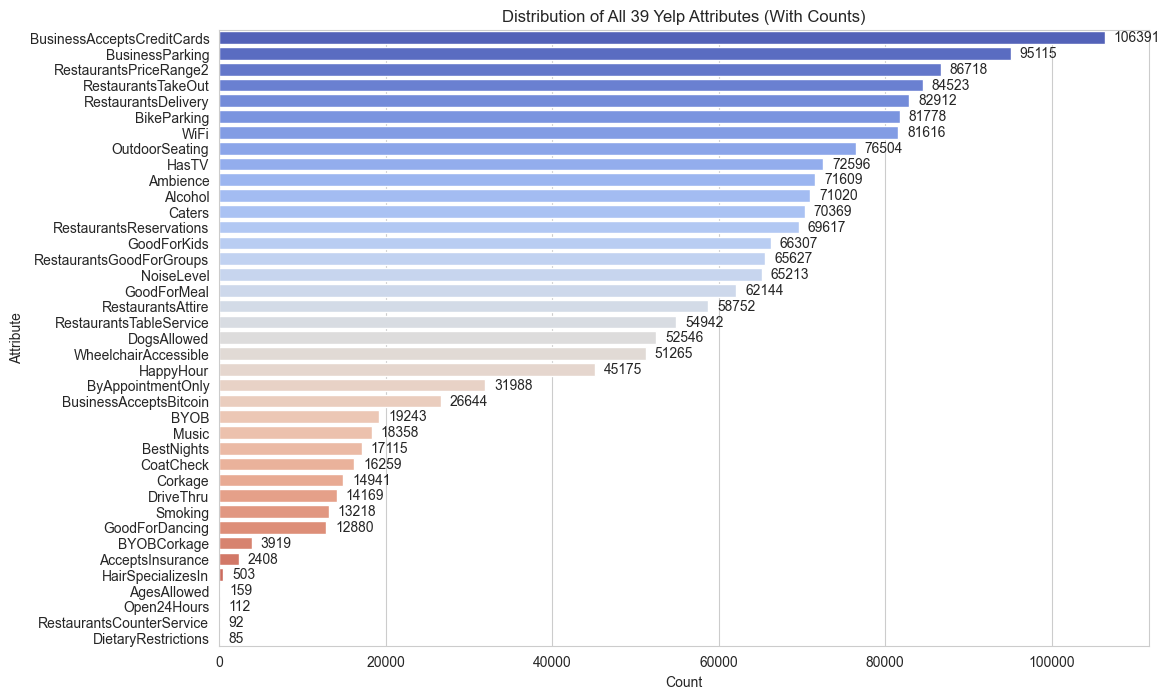

In [38]:
# count attribute key frequencies
attr_counter = Counter()
for val in dfs['attributes'].dropna():
    try:
        d = ast.literal_eval(val) if isinstance(val, str) else val
        if isinstance(d, dict):
            attr_counter.update(d.keys())
    except:
        continue

# dataframe it
attr_df = pd.DataFrame(attr_counter.items(), columns=['attribute', 'count'])
attr_df = attr_df.sort_values(by='count', ascending=False)

# plot
plt.figure(figsize=(12,8))
ax = sns.barplot(x='count', y='attribute', data=attr_df, hue='attribute', palette='coolwarm')

# data label
for i, (count, attr) in enumerate(zip(attr_df['count'], attr_df['attribute'])):
    ax.text(count + max(attr_df['count'])*0.01, i, str(count), va='center')

plt.xlabel("Count")
plt.ylabel("Attribute")
plt.title("Distribution of All 39 Yelp Attributes (With Counts)")
plt.show()

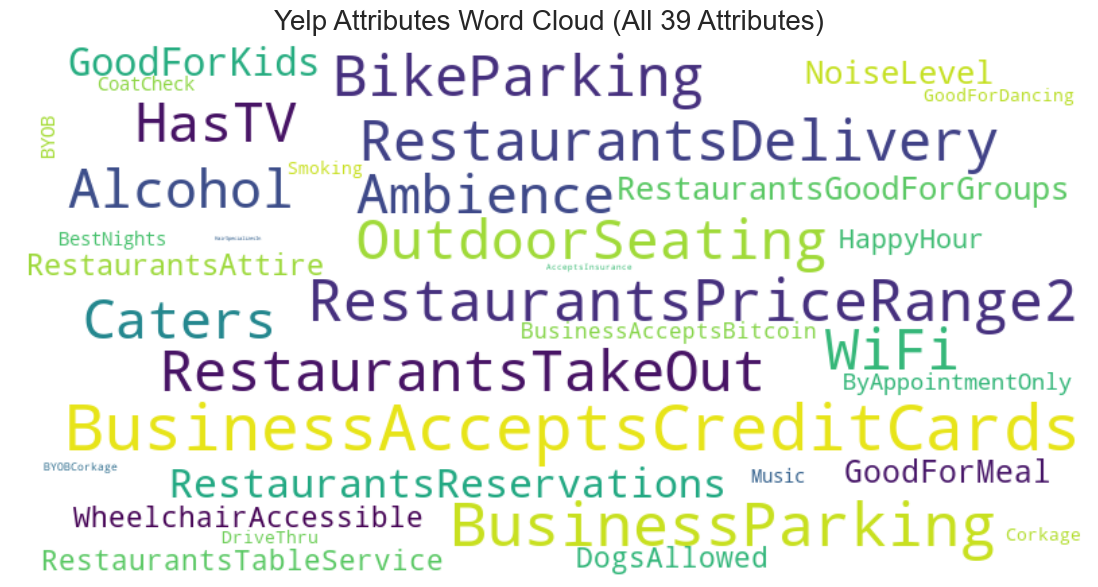

In [39]:
# wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(attr_counter)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Yelp Attributes Word Cloud (All 39 Attributes)", fontsize=20)
plt.show()

# 4. Data analysis II

## User Profile Dataset Selection

In [40]:
agg_dict = {
    'business_id': ('business_id', 'count'),
    'star_user': ('star_user', 'mean'),
    'date': ('date', 'max'),
    'fans': ('fans', 'max'),
    'friend_count': ('friend_count', 'max'),
    'elite_count': ('elite_count', 'max'),
    'yelping_since': ('yelping_since', 'first'),
    'vote': ('vote', 'max'),
    'compliment': ('compliment', 'max'),
    'review_count_user': ('review_count_user', 'max')
}

# user profile dataset
dfs_user = dfs.groupby('user_id').agg(**agg_dict).reset_index()

# rename
dfs_user.rename(columns={
    'business_id': 'business_count',
    'star_user': 'avg_star_user',
    'date': 'last_review_date'
}, inplace=True)

print(dfs_user.head())

                  user_id  business_count  avg_star_user    last_review_date  \
0  --1vcleKg-_ORilNx_RaDw               1            5.0 2021-07-24 19:02:30   
1  --238OiSJBDIhfqcSOQyMA               1            5.0 2020-05-24 19:33:09   
2  --2eQbUFyRvXKgc-AEZXmw               1            1.0 2021-10-20 16:02:26   
3  --7XOV5T9yZR5w1DIy_Dog               1            5.0 2020-06-22 02:23:59   
4  --8b6hitGrfuMiKZNvs6rQ               1            5.0 2021-01-24 20:10:38   

   fans  friend_count  elite_count       yelping_since  vote  compliment  \
0   0.0          56.0          0.0 2018-11-25 19:52:17   0.0         0.0   
1   0.0         625.0          0.0 2016-07-19 15:14:49   0.0         0.0   
2   0.0           0.0          0.0 2016-05-06 13:05:44   8.0         0.0   
3   0.0           0.0          0.0 2018-05-19 20:02:01  46.0         1.0   
4   0.0           0.0          0.0 2020-03-11 19:31:48   0.0         0.0   

   review_count_user  
0                588  
1               

In [41]:
# group variables by user_id
user_tags = dfs_user[['user_id']].drop_duplicates().reset_index(drop=True)

user_tags['user_type'] = None
user_tags['user_activity'] = None
user_tags['High_Quality_Contributor'] = None
user_tags['user_social_influence'] = None
user_tags['user_interest_topic'] = None

user_tags.head()

,user_id,user_type,user_activity,High_Quality_Contributor,user_social_influence,user_interest_topic
0,--1vcleKg-_ORilNx_RaDw,None,None,None,None,None
1,--238OiSJBDIhfqcSOQyMA,None,None,None,None,None
2,--2eQbUFyRvXKgc-AEZXmw,None,None,None,None,None
3,--7XOV5T9yZR5w1DIy_Dog,None,None,None,None,None
4,--8b6hitGrfuMiKZNvs6rQ,None,None,None,None,None


In [42]:
dfs_user.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['user_id', 'business_count', 'avg_star_user', 'last_review_date',
       'fans', 'friend_count', 'elite_count', 'yelping_since', 'vote',
       'compliment', 'review_count_user'],
      dtype='object')>

## 1. User Type

In [43]:
# Ensure date fields are in datetime format
dfs_user['date'] = pd.to_datetime(dfs['date'])
dfs_user['yelping_since'] = pd.to_datetime(dfs['yelping_since'])

# User registration time
user_start = dfs_user[['user_id', 'yelping_since']].drop_duplicates().rename(columns={'yelping_since': 'start_date'})

# User's earliest review time
user_first_review = dfs_user.groupby('user_id')['date'].min().reset_index().rename(columns={'date': 'first_review_date'})

# Merge registration and earliest review time
user_time_df = user_start.merge(user_first_review, on='user_id', how='left')

# Calculate quantiles for registration and earliest review time
start_25, start_75 = user_time_df['start_date'].quantile([0.25, 0.75])
review_25, review_75 = user_time_df['first_review_date'].quantile([0.25, 0.75])

# Define new/old user label function
def label_user(row):
    if row['start_date'] <= start_25 and row['first_review_date'] <= review_25:
        return 'Old User'
    elif row['start_date'] >= start_75 and row['first_review_date'] >= review_75:
        return 'New User'
    else:
        return 'Intermediate User'

user_time_df['user_type_label'] = user_time_df.apply(label_user, axis=1)

# Merge labels into user_tags table
user_tags = user_tags.merge(user_time_df[['user_id', 'user_type_label']], on='user_id', how='left')

# Fill user_type column
user_tags['user_type'] = user_tags['user_type_label']
user_tags.drop(columns=['user_type_label'], inplace=True)

# View results
user_tags.head()

,user_id,user_type,user_activity,High_Quality_Contributor,user_social_influence,user_interest_topic
0,--1vcleKg-_ORilNx_RaDw,Intermediate User,None,None,None,None
1,--238OiSJBDIhfqcSOQyMA,Intermediate User,None,None,None,None
2,--2eQbUFyRvXKgc-AEZXmw,Intermediate User,None,None,None,None
3,--7XOV5T9yZR5w1DIy_Dog,Intermediate User,None,None,None,None
4,--8b6hitGrfuMiKZNvs6rQ,Intermediate User,None,None,None,None


## 2. User Activity

In [44]:
dfs_user_1 = dfs_user.copy()

# Truncate at the 99th percentile
q99 = dfs_user_1['review_count_user'].quantile(0.99)
dfs_user_1['review_count_user'] = dfs_user_1['review_count_user'].clip(upper=q99)

features = ['business_count', 'review_count_user']
X = dfs_user_1[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means clustering
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
dfs_user_1['activity_cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster means
cluster_summary = dfs_user_1.groupby('activity_cluster')[features].mean()
print(cluster_summary)

                  business_count  review_count_user
activity_cluster                                   
0                       1.358465        2195.674938
1                       1.143666         191.286687
2                       6.155382         613.576125


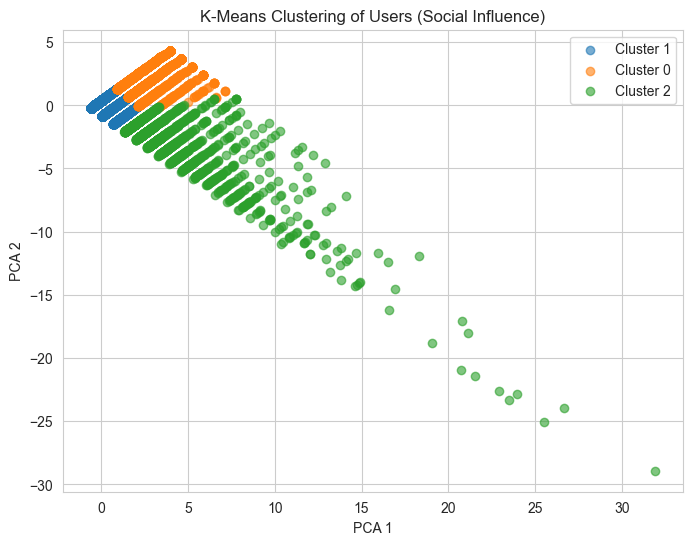

In [45]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for cluster in dfs_user_1['activity_cluster'].unique():
    idx = dfs_user_1['activity_cluster'] == cluster
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering of Users (Social Influence)')
plt.legend()
plt.show()

In [46]:
# Define the mapping from cluster to label
cluster_label_map = {
    0: "High Activity",
    1: "Low Activity",
    2: "Moderate Activity",
}

# Map activity_cluster to label
dfs_user_1['user_activity_label'] = dfs_user_1['activity_cluster'].map(cluster_label_map)

# Merge into the user_tags table
user_activity_labels = dfs_user_1[['user_id', 'user_activity_label']]
user_tags = user_tags.merge(user_activity_labels, on='user_id', how='left')

# Fill the user_activity column
user_tags['user_activity'] = user_tags['user_activity_label']
user_tags.drop(columns=['user_activity_label'], inplace=True)

user_tags.head()

,user_id,user_type,user_activity,High_Quality_Contributor,user_social_influence,user_interest_topic
0,--1vcleKg-_ORilNx_RaDw,Intermediate User,Low Activity,None,None,None
1,--238OiSJBDIhfqcSOQyMA,Intermediate User,Low Activity,None,None,None
2,--2eQbUFyRvXKgc-AEZXmw,Intermediate User,Low Activity,None,None,None
3,--7XOV5T9yZR5w1DIy_Dog,Intermediate User,Low Activity,None,None,None
4,--8b6hitGrfuMiKZNvs6rQ,Intermediate User,Low Activity,None,None,None


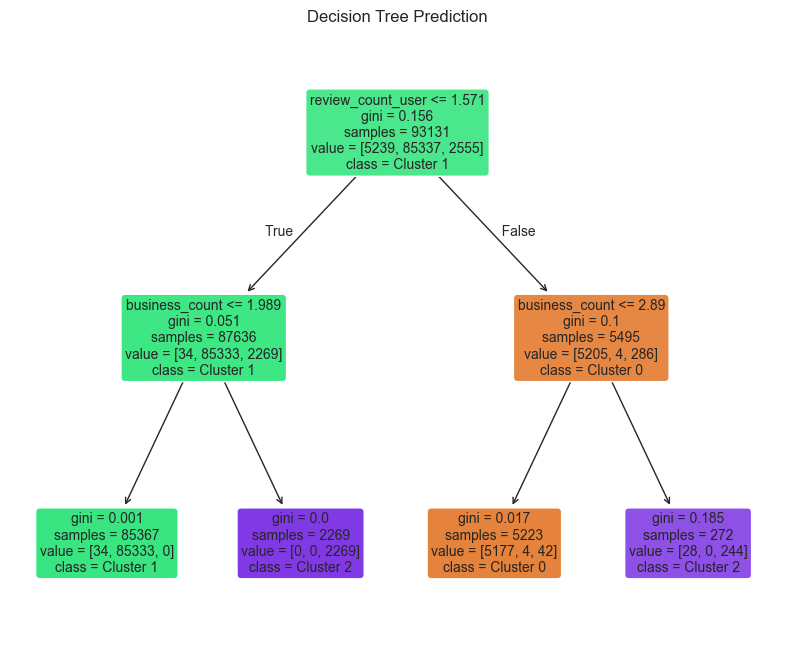

In [47]:
# Decision Tree
y = dfs_user_1['activity_cluster']
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_scaled, y)

plt.figure(figsize=(10, 8))
plot_tree(
    dt,
    feature_names=features,
    class_names=[f'Cluster {i}' for i in range(3)],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Prediction")
plt.show()

## 3. High-Quality Contributor

In [48]:
dfs_user_2 = dfs_user.copy()
features = ['review_count_user', 'compliment', 'vote', 'elite_count']

# Remove extreme values (above 99th percentile)
for col in features:
    upper = dfs_user_2[col].quantile(0.99)
    dfs_user_2 = dfs_user_2[dfs_user_2[col] <= upper]

# Standardize after filtering
X = dfs_user_2[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
dfs_user_2['activity_cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster means
cluster_summary = dfs_user_2.groupby('activity_cluster')[features].mean()
print(cluster_summary)

                  review_count_user  compliment        vote  elite_count
activity_cluster                                                        
0                        431.380811   51.991633  386.011714     3.977687
1                        736.081765    3.008564   34.440979     0.158843
2                       2223.872349    4.744305   51.494108     0.420267
3                        112.299075    1.365600   18.760160     0.036323


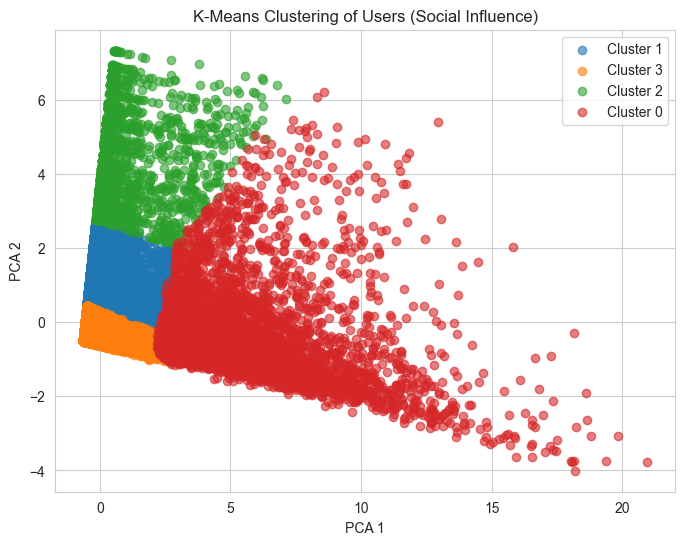

In [49]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for cluster in dfs_user_2['activity_cluster'].unique():
    idx = dfs_user_2['activity_cluster'] == cluster
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering of Users (Social Influence)')
plt.legend()
plt.show()

In [50]:
# Define the mapping from cluster to label
cluster_label_map = {
    0: "High Quality & Recognized",
    1: "Quantity Over Quality",
    2: "Super Active but Low Recognition",
    3: "Low Activity & Low Quality"
}

# Map activity_cluster to label
dfs_user_2['High_Quality_Contributor_label'] = dfs_user_2['activity_cluster'].map(cluster_label_map)

# Merge into the user_tags table
user_hqc_labels = dfs_user_2[['user_id', 'High_Quality_Contributor_label']]
user_tags = user_tags.merge(user_hqc_labels, on='user_id', how='left')

# Fill the high_quality_contributor column
user_tags['High_Quality_Contributor'] = user_tags['High_Quality_Contributor_label']
user_tags.drop(columns=['High_Quality_Contributor_label'], inplace=True)

user_tags.tail()

,user_id,user_type,user_activity,High_Quality_Contributor,user_social_influence,user_interest_topic
93126,zzn7qyGL49Ff0hTSgrsbdg,Intermediate User,Low Activity,Low Activity & Low Quality,None,None
93127,zzoUzXqa85Rgfn938mZdPA,Intermediate User,Low Activity,Low Activity & Low Quality,None,None
93128,zzqVInn9-mjoj7diZLFNkQ,Intermediate User,Low Activity,Low Activity & Low Quality,None,None
93129,zztU-2Yr1_P4IAbk0cqCxA,Intermediate User,Low Activity,Low Activity & Low Quality,None,None
93130,zzw0Z6-_VDp9ShIRSKIsQw,Intermediate User,Moderate Activity,Quantity Over Quality,None,None


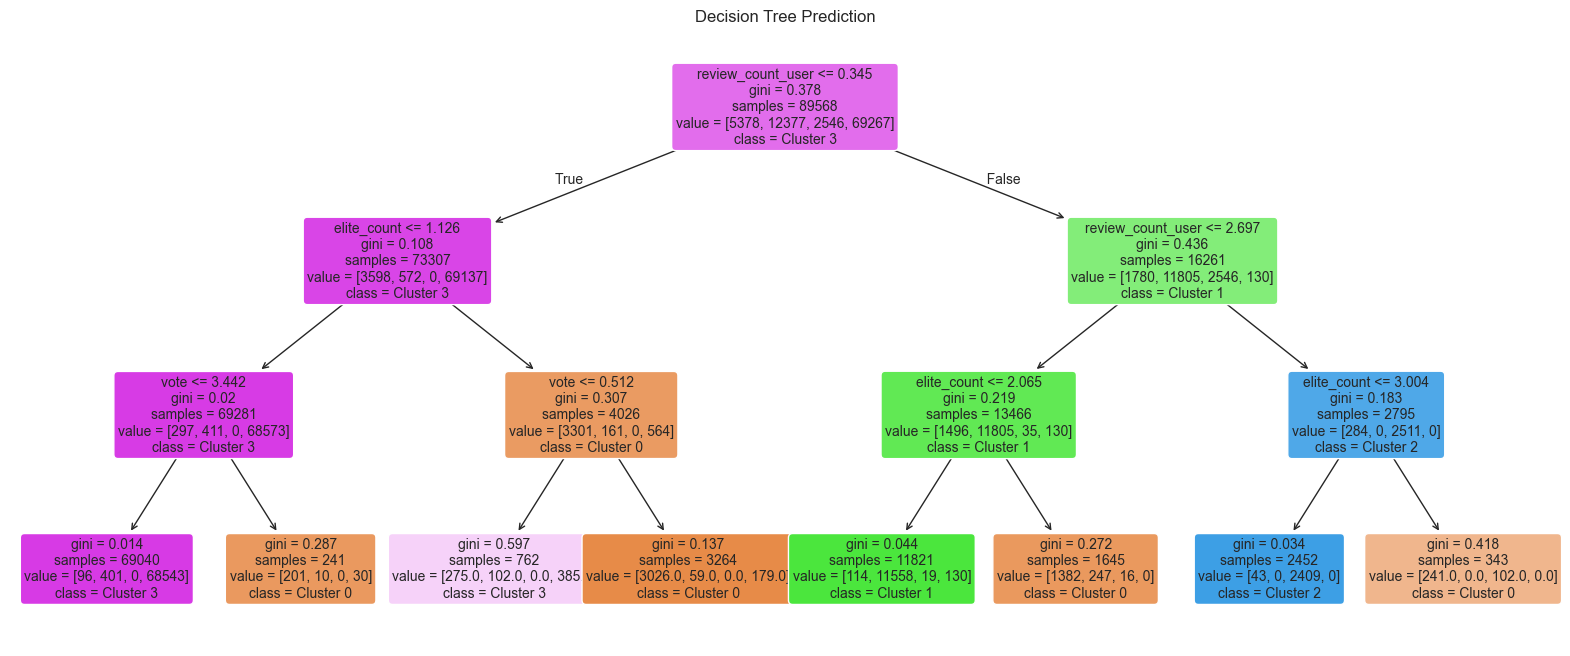

In [51]:
# Decision Tree
y = dfs_user_2['activity_cluster']
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_scaled, y)

plt.figure(figsize=(20, 8))
plot_tree(
    dt,
    feature_names=features,
    class_names=[f'Cluster {i}' for i in range(4)],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Prediction")
plt.show()

## 4. User Social Influence

In [52]:
dfs_user['fans'].describe()

count    93131.000000
mean         3.271252
std         30.970117
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       3493.000000
Name: fans, dtype: float64

In [53]:
dfs_user_3 = dfs_user.copy()

# Remove extreme values (above 99th percentile)
for col in features:
    upper = dfs_user_3[col].quantile(0.99)
    dfs_user_3 = dfs_user_3[dfs_user_3[col] <= upper]

features = ['friend_count', 'fans', 'vote', 'compliment']
X = dfs_user_3[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
dfs_user_3['activity_cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster means
cluster_summary = dfs_user_3.groupby('activity_cluster')[features].mean()
print(cluster_summary)

                  friend_count       fans        vote  compliment
activity_cluster                                                 
0                   376.923488   1.075865   32.850210    3.377548
1                    21.962692   0.265325   17.412478    1.326314
2                   227.176183  21.044861  742.198206  100.867863
3                   100.168179   6.812126  285.647036   34.151960


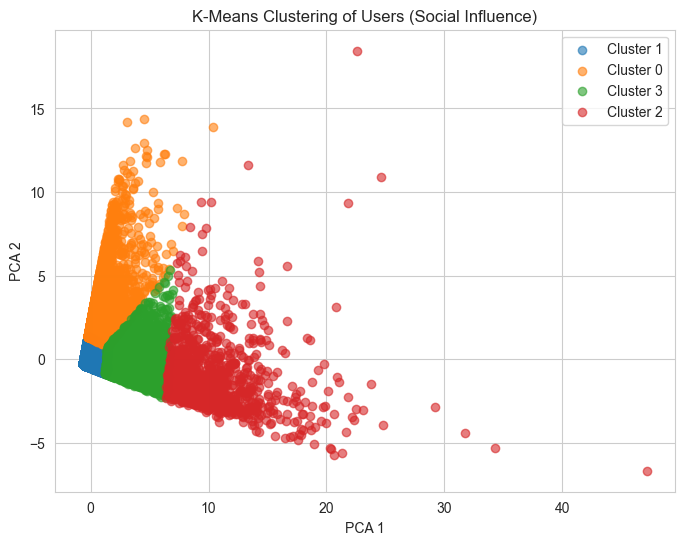

In [54]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
for cluster in dfs_user_3['activity_cluster'].unique():
    idx = dfs_user_3['activity_cluster'] == cluster
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=f'Cluster {cluster}', alpha=0.6)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('K-Means Clustering of Users (Social Influence)')
plt.legend()
plt.show()

In [55]:
# Define the mapping from cluster to label
cluster_social_map = {
    0: 'Low Social Influencer',
    1: 'Friend-Centric Influencer',
    2: 'High Social Influencer',
    3: 'Active Social Influencer'
}

# Map activity_cluster to label
dfs_user_3['user_social_influence_label'] = dfs_user_3['activity_cluster'].map(cluster_social_map)

# Merge into the user_tags table
user_social_labels = dfs_user_3[['user_id', 'user_social_influence_label']]
user_tags = user_tags.merge(user_social_labels, on='user_id', how='left')

# Fill the user_social_influence column
user_tags['user_social_influence'] = user_tags['user_social_influence_label']
user_tags.drop(columns=['user_social_influence_label'], inplace=True)

user_tags.tail()


,user_id,user_type,user_activity,High_Quality_Contributor,user_social_influence,user_interest_topic
93126,zzn7qyGL49Ff0hTSgrsbdg,Intermediate User,Low Activity,Low Activity & Low Quality,Friend-Centric Influencer,None
93127,zzoUzXqa85Rgfn938mZdPA,Intermediate User,Low Activity,Low Activity & Low Quality,Friend-Centric Influencer,None
93128,zzqVInn9-mjoj7diZLFNkQ,Intermediate User,Low Activity,Low Activity & Low Quality,Friend-Centric Influencer,None
93129,zztU-2Yr1_P4IAbk0cqCxA,Intermediate User,Low Activity,Low Activity & Low Quality,Low Social Influencer,None
93130,zzw0Z6-_VDp9ShIRSKIsQw,Intermediate User,Moderate Activity,Quantity Over Quality,Friend-Centric Influencer,None


## 5. User Category Interest

In [56]:
dfs_copy = dfs.copy()

dfs_copy['categories_list'] = dfs_copy['categories'].apply(
    lambda x: list(set(c.strip().lower() for c in x.split(',') if c))
)

cat_counter = Counter([c for cats in dfs_copy['categories_list'] for c in cats])
len(cat_counter)

1207

In [57]:
cat_counter

Counter({'restaurants': 79048,
         'food': 31750,
         'nightlife': 24203,
         'bars': 23125,
         'american (traditional)': 15704,
         'breakfast & brunch': 14111,
         'american (new)': 13997,
         'sandwiches': 11617,
         'seafood': 10965,
         'shopping': 9379,
         'event planning & services': 9285,
         'pizza': 8660,
         'mexican': 8238,
         'coffee & tea': 7950,
         'burgers': 7864,
         'italian': 7391,
         'cocktail bars': 6584,
         'beauty & spas': 6270,
         'salad': 6221,
         'home services': 5935,
         'desserts': 5890,
         'fast food': 4898,
         'automotive': 4866,
         'cafes': 4722,
         'hotels & travel': 4530,
         'local services': 4415,
         'arts & entertainment': 4192,
         'steakhouses': 4179,
         'bakeries': 4105,
         'specialty food': 4057,
         'health & medical': 4055,
         'sushi bars': 3806,
         'japanese': 3795,
  

In [58]:
# Select the top 400 most frequent categories
top_cats = set([c for c, _ in cat_counter.most_common(400)])

# Replace categories not in top 400 with 'other'
dfs_copy['categories_top'] = dfs_copy['categories_list'].apply(
    lambda cats: [c if c in top_cats else 'other' for c in cats]
)

# Multi-hot encoding
mlb = MultiLabelBinarizer(sparse_output=False)
categories_encoded = mlb.fit_transform(dfs_copy['categories_top'])

# Convert to DataFrame and merge back
cat_df = pd.DataFrame(categories_encoded, columns=mlb.classes_, index=dfs_copy.index)
dfs_copy = pd.concat([dfs_copy, cat_df], axis=1)

# Output the total number of columns
len(mlb.classes_)

401

In [59]:
print(dfs_copy.columns.tolist())

['user_id', 'business_id', 'star_user', 'date', 'review_count_bus', 'yelping_since', 'fans', 'friend_count', 'elite_count', 'vote', 'compliment', 'categories', 'star_bus', 'review_count_user', 'attributes', 'year', 'categories_list', 'categories_top', 'acai bowls', 'accessories', 'active life', 'adult entertainment', 'african', 'air duct cleaning', 'airports', 'american (new)', 'american (traditional)', 'amusement parks', 'antiques', 'apartments', 'appliances', 'appliances & repair', 'arcades', 'art galleries', 'arts & crafts', 'arts & entertainment', 'asian fusion', 'auto customization', 'auto detailing', 'auto glass services', 'auto loan providers', 'auto parts & supplies', 'auto repair', 'automotive', 'bagels', 'bakeries', 'banks & credit unions', 'barbeque', 'barbers', 'bars', 'beaches', 'beauty & spas', 'bed & breakfast', 'beer', 'beer bar', 'beer gardens', 'bike rentals', 'bike repair/maintenance', 'bikes', 'blow dry/out services', 'boat charters', 'boat tours', 'boating', 'body 

In [72]:
dfs_copy = dfs_copy.loc[:, ~dfs_copy.columns.duplicated()]
start_col = 'active life'
end_col = 'zoos'
category_cols = dfs_copy.loc[:, start_col:end_col].columns

# Aggregate at user level, take the mean for each category per user
user_emb = dfs_copy.groupby('user_id')[category_cols].mean()

# Convert to integer pseudo-counts (LDA assumes discrete counts)
X = (user_emb * 100).astype(int)

# LDA
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Output top categories for each topic
n_top = 10
category_names = category_cols.tolist()
print("Top topics:")
for i, topic in enumerate(lda.components_):
    top_idx = topic.argsort()[-n_top:][::-1]
    top_cats = [category_names[j] for j in top_idx]
    print(f"topic {i}: {top_cats}")

Top topics:
topic 0: ['restaurants', 'burgers', 'fast food', 'american (traditional)', 'arts & entertainment', 'music venues', 'chicken shop', 'american (new)', 'gastropubs', 'chicken wings']
topic 1: ['mexican', 'home services', 'other', 'local services', 'tacos', 'tex-mex', 'contractors', 'plumbing', 'professional services', 'sporting goods']
topic 2: ['food', 'event planning & services', 'coffee & tea', 'restaurants', 'desserts', 'hotels & travel', 'bakeries', 'caterers', 'venues & event spaces', 'hotels']
topic 3: ['beauty & spas', 'shopping', 'pets', 'nail salons', 'health & medical', 'pet services', 'flowers & gifts', 'veterinarians', 'pet groomers', 'drugstores']
topic 4: ['automotive', 'specialty food', 'active life', 'other', 'auto repair', 'food', 'car dealers', 'auto parts & supplies', 'local flavor', 'tires']
topic 5: ['nightlife', 'bars', 'restaurants', 'cocktail bars', 'american (new)', 'american (traditional)', 'food', 'wine bars', 'sports bars', 'beer']
topic 6: ['resta

In [140]:
# Generate topic distribution for each user
topic_dist = lda.transform(X)  # shape = (n_users, n_topics)
topic_df = pd.DataFrame(topic_dist, index=user_emb.index, columns=[f"topic_{i}" for i in range(n_topics)])

# Find the main topic for each user (topic with the highest probability)
user_main_topic_num = topic_df.idxmax(axis=1)
user_main_topic_index = user_main_topic_num.apply(lambda x: int(x.split('_')[1]))

# Topic label mapping
topic_names = {
    0: "Fast Food & Entertainment",
    1: "Nightlife & Bars",
    2: "Mexican Food & Local Services",
    3: "Beauty, Health & Pets",
    4: "Specialty & International Dining",
    5: "Cafés, Desserts & Catering",
    6: "Automotive & Services",
    7: "Casual & Global Dining",
    8: "Shopping & Housing",
    9: "Medical & Personal Care"
}

user_main_topic_label = user_main_topic_index.map(topic_names)

# Build a DataFrame with only two columns for merging
user_topics_to_merge = pd.DataFrame({
    'main_topic_num': user_main_topic_index,
    'user_interest_topic': user_main_topic_label
}, index=topic_df.index)  # index = user_id
user_tags = user_tags.drop(columns=['user_interest_topic', 'main_topic_num'], errors='ignore')

# Merge with user_tags
user_tags = user_tags.merge(
    user_topics_to_merge,
    left_on='user_id',
    right_index=True,
    how='left'
)

user_tags.head(10)

,user_id,user_type,user_activity,High_Quality_Contributor,user_social_influence,main_topic_num,user_interest_topic
0,--1vcleKg-_ORilNx_RaDw,Intermediate User,Low Activity,Quantity Over Quality,Friend-Centric Influencer,2,Mexican Food & Local Services
1,--238OiSJBDIhfqcSOQyMA,Intermediate User,Low Activity,Low Activity & Low Quality,Low Social Influencer,2,Mexican Food & Local Services
2,--2eQbUFyRvXKgc-AEZXmw,Intermediate User,Low Activity,Low Activity & Low Quality,Friend-Centric Influencer,5,"Cafés, Desserts & Catering"
3,--7XOV5T9yZR5w1DIy_Dog,Intermediate User,Low Activity,Quantity Over Quality,Friend-Centric Influencer,5,"Cafés, Desserts & Catering"
4,--8b6hitGrfuMiKZNvs6rQ,Intermediate User,Low Activity,Low Activity & Low Quality,Friend-Centric Influencer,5,"Cafés, Desserts & Catering"
5,--B4MfqBxNuXX8ujyh8VXg,Intermediate User,Low Activity,Low Activity & Low Quality,Friend-Centric Influencer,9,Medical & Personal Care
6,--CIuK7sUpaNzalLAlHJKA,Intermediate User,Low Activity,Quantity Over Quality,Active Social Influencer,5,"Cafés, Desserts & Catering"
7,--JfSCDuT5nsXCosHl5-IA,Intermediate User,Low Activity,Low Activity & Low Quality,Friend-Centric Influencer,6,Automotive & Services
8,--MUq57EvgL_U-dqAdqINA,Intermediate User,Low Activity,Low Activity & Low Quality,Friend-Centric Influencer,1,Nightlife & Bars
9,--So-2pYXoKJMZV1CMrjdg,Intermediate User,Low Activity,Low Activity & Low Quality,Friend-Centric Influencer,8,Shopping & Housing


# 5. Data analysis III

In [141]:
dfs_5 = dfs.copy()

# Flatten nested attributes dictionary
def flatten_dict(d, parent_key='', sep='_'):
    items = {}
    for k, v in (d or {}).items():
        k_str = str(k)
        new_key = f"{parent_key}{sep}{k_str}" if parent_key else k_str
        if isinstance(v, dict):
            items.update(flatten_dict(v, new_key, sep=sep))
        else:
            items[new_key] = v
    return items

dfs_5 = dfs.copy()
dfs_flat = dfs_5['attributes'].apply(lambda x: flatten_dict(x) if isinstance(x, dict) else {})
attr_df = pd.DataFrame(dfs_flat.tolist(), index=dfs_5.index)

# Keep only attributes with value = True
attr_df_bool = attr_df.map(lambda x: 1 if str(x).lower() == 'true' else 0)

# Drop columns with all zeros (attributes that are never True for any business)
attr_df_selected = attr_df_bool.loc[:, (attr_df_bool.sum(axis=0) > 0)]

# Merge back into dfs_5
dfs_5 = pd.concat([dfs_5, attr_df_selected], axis=1)

In [142]:
# Prepare business-level metrics
business_metrics = dfs_5.groupby('business_id').agg({
    'star_bus': 'mean',           # average rating
    'review_count_bus': 'sum'     # total number of reviews
}).reset_index()

# Extract attribute matrix, one row per business, remove duplicates
business_attr = dfs_5[['business_id'] + attr_df_selected.columns.tolist()].drop_duplicates('business_id')

# Merge business metrics with attributes
business_df = business_metrics.merge(business_attr, on='business_id', how='left')

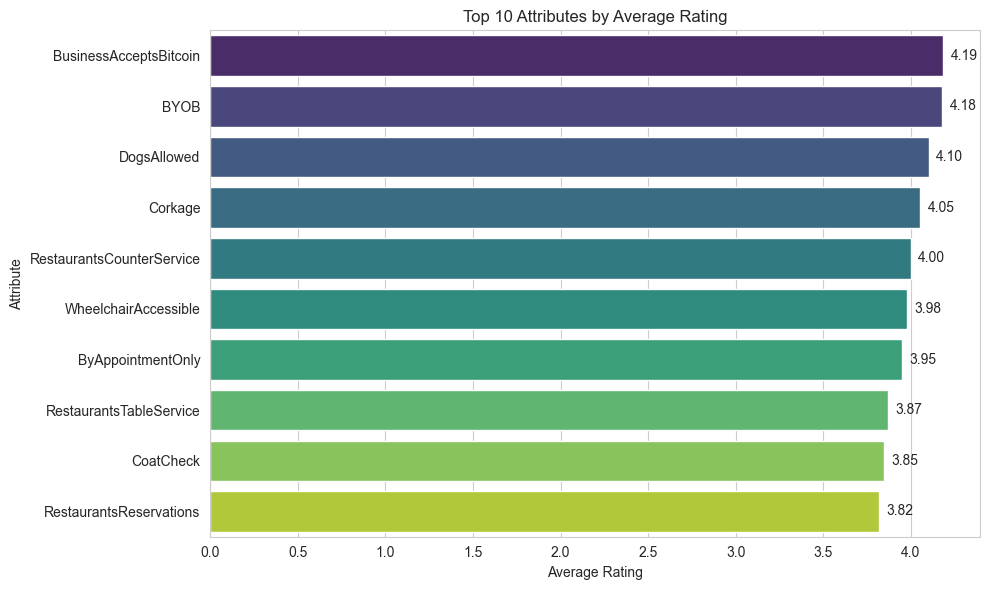

In [143]:
# Calculate the average rating for each attribute
attr_cols = attr_df_selected.columns.tolist()
avg_ratings = {}
for attr in attr_cols:
    avg_rating = business_df[business_df[attr] == 1]['star_bus'].mean()
    avg_ratings[attr] = avg_rating

# Sort and select top 10
top_attrs_rating = sorted(avg_ratings.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract labels and values for top attributes
top_attrs_rating_labels = [x[0] for x in top_attrs_rating]
top_attrs_rating_values = [x[1] for x in top_attrs_rating]

plt.figure(figsize=(10,6))
ax = sns.barplot(x=top_attrs_rating_values, y=top_attrs_rating_labels, hue=top_attrs_rating_labels, palette='viridis', dodge=False, legend=False)

plt.xlabel("Average Rating")
plt.ylabel("Attribute")
plt.title("Top 10 Attributes by Average Rating")

# Add data labels
for i, val in enumerate(top_attrs_rating_values):
    ax.text(val + max(top_attrs_rating_values)*0.01, i, f"{val:.2f}", va='center')

plt.tight_layout()
plt.show()

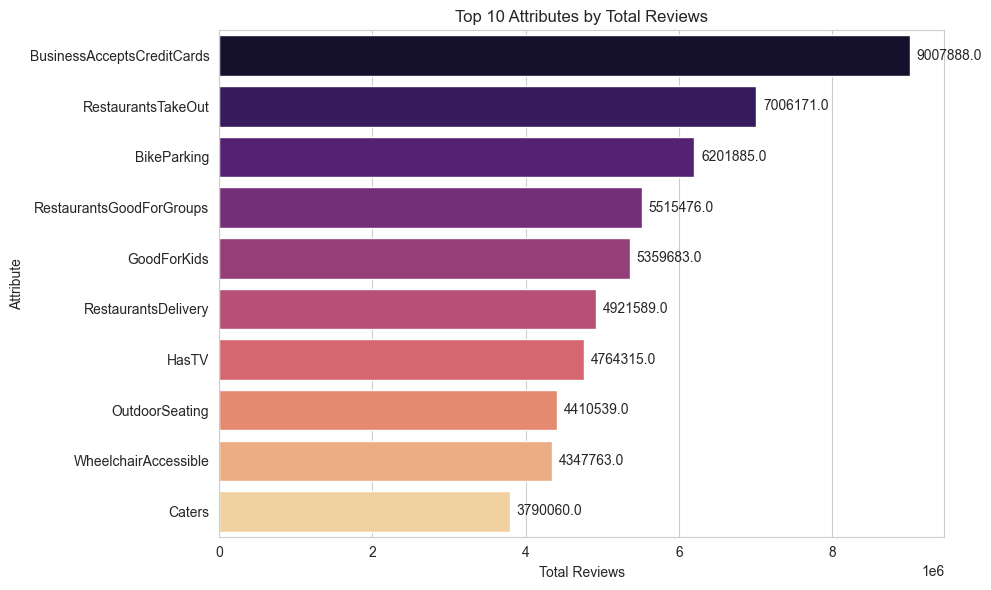

In [55]:
# Calculate the total number of reviews for each attribute (popularity)
total_reviews = {}
for attr in attr_cols:
    total = business_df[business_df[attr] == 1]['review_count_bus'].sum()
    total_reviews[attr] = total

# Sort and select top 10
top_attrs_reviews = sorted(total_reviews.items(), key=lambda x: x[1], reverse=True)[:10]

# Extract labels and values for top attributes
top_attrs_reviews_labels = [x[0] for x in top_attrs_reviews]
top_attrs_reviews_values = [x[1] for x in top_attrs_reviews]

plt.figure(figsize=(10,6))
ax = sns.barplot(
    x=top_attrs_reviews_values,
    y=top_attrs_reviews_labels,
    hue=top_attrs_reviews_labels,
    palette='magma',
    dodge=False,
    legend=False
)

plt.xlabel("Total Reviews")
plt.ylabel("Attribute")
plt.title("Top 10 Attributes by Total Reviews")

# Add data labels on each bar
for i, val in enumerate(top_attrs_reviews_values):
    ax.text(val + max(top_attrs_reviews_values)*0.01, i, str(val), va='center')

plt.tight_layout()
plt.show()

# 6. Recommendation

In [144]:
# user label encode
user_tags_encoded = user_tags.copy()
user_tags_encoded = user_tags_encoded.drop(columns=['user_interest_topic'])
text_cols = ['user_type', 'user_activity', 'High_Quality_Contributor',
             'user_social_influence']

# LabelEncoder
encoders = {}
for col in text_cols:
    le = LabelEncoder()
    user_tags_encoded[col] = le.fit_transform(user_tags[col].astype(str))
    encoders[col] = le

user_tags_encoded.head(10)

,user_id,user_type,user_activity,High_Quality_Contributor,user_social_influence,main_topic_num
0,--1vcleKg-_ORilNx_RaDw,0,1,2,1,2
1,--238OiSJBDIhfqcSOQyMA,0,1,1,3,2
2,--2eQbUFyRvXKgc-AEZXmw,0,1,1,1,5
3,--7XOV5T9yZR5w1DIy_Dog,0,1,2,1,5
4,--8b6hitGrfuMiKZNvs6rQ,0,1,1,1,5
5,--B4MfqBxNuXX8ujyh8VXg,0,1,1,1,9
6,--CIuK7sUpaNzalLAlHJKA,0,1,2,0,5
7,--JfSCDuT5nsXCosHl5-IA,0,1,1,1,6
8,--MUq57EvgL_U-dqAdqINA,0,1,1,1,1
9,--So-2pYXoKJMZV1CMrjdg,0,1,1,1,8


In [59]:
from sklearn.preprocessing import MultiLabelBinarizer

# Process business categories -> convert to list
business_core['categories_list'] = business_core['categories'].apply(
    lambda x: [c.strip().lower() for c in x.split(',')] if isinstance(x, str) else []
)

# Multi-hot encode (aligned with category_cols)
mlb = MultiLabelBinarizer(classes=category_cols)  # 强制使用用户的类别列
business_cat_encoded = mlb.fit_transform(business_core['categories_list'])

business_cat_df = pd.DataFrame(
    business_cat_encoded,
    index=business_core['business_id'],
    columns=mlb.classes_
)

# Project into topic space using the same LDA model
business_topic_dist = lda.transform(business_cat_df)

business_topic_df = pd.DataFrame(
    business_topic_dist,
    index=business_core['business_id'],
    columns=[f"topic_{i}" for i in range(n_topics)]
)

business_topic_df.head()

/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/preprocessing/_label.py:909: UserWarning: unknown class(es) ['& probates', '3d printing', 'acai bowls', 'accessories', 'accountants', 'acne treatment', 'acupuncture', 'addiction medicine', 'adoption services', 'adult', 'adult education', 'advertising', 'aerial fitness', 'aerial tours', 'aestheticians', 'afghan', 'aircraft dealers', 'aircraft repairs', 'airlines', 'airport lounges', 'airport shuttles', 'airport terminals', 'airsoft', 'allergists', 'alternative medicine', 'amateur sports teams', 'anesthesiologists', 'animal assisted therapy', 'animal physical therapy', 'animal shelters', 'apartment agents', 'appraisal services', 'aquarium services', 'aquariums', 'arabic', 'archery', 'architects', 'architectural tours', 'argentine', 'armenian', 'art classes', 'art consultants', 'art installation', 'art museums', 'art restoration', 'art schools', 'art space rentals', 'art supplies', 'art tours', 'artificial turf', 'assisted 

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
business_id,,,,,,,,,,
Pns2l4eNsfO8kk83dixA6A,0.025000,0.025000,0.025000,0.438398,0.025000,0.025000,0.025000,0.025000,0.025001,0.361601
mpf3x-BjTdTEA3yCZrAYPw,0.016667,0.016670,0.016667,0.016667,0.016667,0.016667,0.016667,0.016667,0.016668,0.849995
tUFrWirKiKi_TAnsVWINQQ,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.014286,0.871428,0.014286
MTSW4McQd7CbVtyjqoe9mw,0.016670,0.016667,0.849985,0.016667,0.016667,0.016669,0.016671,0.016671,0.016667,0.016667
mWMc6_wTdE0EUBKIGXDVfA,0.025001,0.025000,0.025021,0.025000,0.025003,0.774971,0.025000,0.025004,0.025000,0.025000


In [60]:
# Find the topic ID with the highest probability
business_top_topic = np.argmax(business_topic_dist, axis=1)

# Map to topic name
business_top_topic_name = [topic_names[i] for i in business_top_topic]

# Merge back into the DataFrame
business_topic_df['top_topic'] = business_top_topic
business_topic_df['top_topic_name'] = business_top_topic_name
business_topic_df.drop(columns=['topic_0','topic_1','topic_2','topic_3','topic_4','topic_5','topic_6','topic_7','topic_8','topic_9'], inplace=True)
business_topic_df.head()

,top_topic,top_topic_name
business_id,,
Pns2l4eNsfO8kk83dixA6A,3,Beauty & Health
mpf3x-BjTdTEA3yCZrAYPw,9,Events & Hotels
tUFrWirKiKi_TAnsVWINQQ,8,Dining & Pets
MTSW4McQd7CbVtyjqoe9mw,2,Home & Professional Services
mWMc6_wTdE0EUBKIGXDVfA,5,Desserts & Snacks


In [66]:
# First select the required columns
business_extra = business_core[['business_id', 'stars', 'review_count']].copy()

# Align the index (business_topic_df is already indexed by business_id)
business_extra = business_extra.set_index('business_id')

# Merge into business_topic_df
business_features = business_topic_df.join(business_extra, how='left')
business_features = business_features.reset_index()

business_features.head()

,business_id,top_topic,top_topic_name,stars,review_count
0,Pns2l4eNsfO8kk83dixA6A,3,Beauty & Health,5.0,7
1,mpf3x-BjTdTEA3yCZrAYPw,9,Events & Hotels,3.0,15
2,tUFrWirKiKi_TAnsVWINQQ,8,Dining & Pets,3.5,22
3,MTSW4McQd7CbVtyjqoe9mw,2,Home & Professional Services,4.0,80
4,mWMc6_wTdE0EUBKIGXDVfA,5,Desserts & Snacks,4.5,13


In [62]:
business_features.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['top_topic', 'top_topic_name', 'stars', 'review_count'], dtype='object')>

In [166]:
user_tags_encoded.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['user_id', 'user_type', 'user_activity', 'High_Quality_Contributor',
       'user_social_influence', 'main_topic_num'],
      dtype='object')>

In [64]:
dfs.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['user_id', 'business_id', 'star_user', 'date', 'review_count_bus',
       'yelping_since', 'fans', 'friend_count', 'elite_count', 'vote',
       'compliment', 'categories', 'star_bus', 'review_count_user',
       'attributes', 'year'],
      dtype='object')>

In [67]:
# First merge user features
data = dfs.merge(
    user_tags_encoded[['user_id','user_type','user_activity','High_Quality_Contributor','user_social_influence','main_topic_num']],
    on='user_id', how='left'
)

# Then merge business features
data = data.merge(
    business_features[['business_id','top_topic','stars','review_count']],
    on='business_id', how='left'
)

In [68]:
data['like'] = (data['star_user'] >= 4).astype(int)

In [75]:
feature_cols = ['user_activity','High_Quality_Contributor','user_social_influence','main_topic_num',
                'stars','review_count','review_count_user','review_count_bus','fans','friend_count','elite_count']
categorical_cols = ['user_type','top_topic']

X = pd.get_dummies(data[feature_cols + categorical_cols], columns=categorical_cols)
y = data['like']

rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X, y)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [145]:
feature_cols = ['user_activity','High_Quality_Contributor','user_social_influence','main_topic_num',
                'stars','review_count','review_count_user','review_count_bus','fans','friend_count','elite_count']
categorical_cols = ['user_type','top_topic']

X = pd.get_dummies(data[feature_cols + categorical_cols], columns=categorical_cols)
y = data['like']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy {acc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy 0.7559

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.44      0.55      8016
           1       0.77      0.91      0.83     16073

    accuracy                           0.76     24089
   macro avg       0.74      0.68      0.69     24089
weighted avg       0.75      0.76      0.74     24089



In [151]:
user_id_to_check = input("User ID: ")

# Candidate businesses: all businesses in the dataset
all_businesses = data['business_id'].unique()

# Retrieve user features
user_feat = data[data['user_id'] == user_id_to_check].iloc[0]

# Construct candidate user–business pairs
candidate_data = pd.DataFrame({
    'user_id': user_id_to_check,
    'business_id': all_businesses
})

# Business features (keep only business-related ones)
business_feat_cols = ['stars','review_count','review_count_bus']
candidate_data = candidate_data.merge(
    data[['business_id'] + business_feat_cols].drop_duplicates('business_id'),
    on='business_id',
    how='left'
)

# User features (assign separately, including review_count_user)
for col in ['user_activity','High_Quality_Contributor','user_social_influence','main_topic_num',
            'user_type','top_topic','fans','friend_count','elite_count','review_count_user']:
    candidate_data[col] = user_feat[col]

# Feature processing
X_pred = pd.get_dummies(candidate_data[feature_cols + categorical_cols], columns=categorical_cols)

# Align columns to ensure full consistency with training
X_pred = X_pred.reindex(columns=X.columns, fill_value=0)

# Predict the probability of user preference
candidate_data['like_prob'] = rf.predict_proba(X_pred)[:, 1]

# Take Top-5 recommendations
top5 = candidate_data.nlargest(5, 'like_prob')[['user_id', 'business_id']]

print(top5)

                      user_id             business_id
44875  zzn7qyGL49Ff0hTSgrsbdg  hN_ThL45R2cctTFW1Ep3TA
45507  zzn7qyGL49Ff0hTSgrsbdg  yRDO7_CCE9iaDxepL2YCGg
30135  zzn7qyGL49Ff0hTSgrsbdg  twtvekBAqYb8Zcq7sfZnnA
37589  zzn7qyGL49Ff0hTSgrsbdg  W0JuHwr5zctnvQhi41QA1Q
45434  zzn7qyGL49Ff0hTSgrsbdg  LVnL-fOitMy8jNHRlgsfIg


# K-means

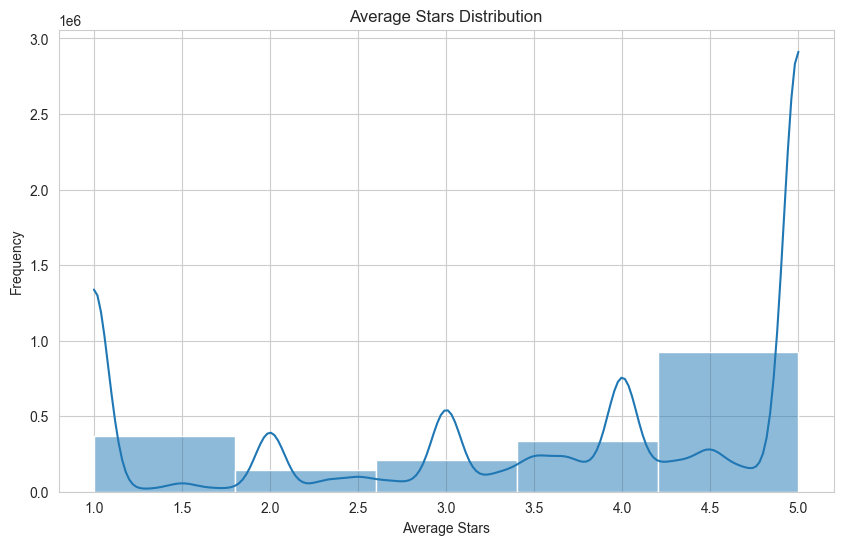

In [333]:
# Compute user features
user_profile = review_core.groupby('user_id').agg({
    'stars': ['count', 'mean', 'max', 'min'],
    'business_id': 'nunique'
}).reset_index()

user_profile.columns = ['user_id', 'review_count', 'average_stars', 'max_stars', 'min_stars', 'unique_business_count']

# Visualize user rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(user_profile['average_stars'], bins=5, kde=True)
plt.title('Average Stars Distribution')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')

# Save the figure to the current directory
plt.savefig('average_stars_distribution.png')

# show plot
plt.show()

/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_

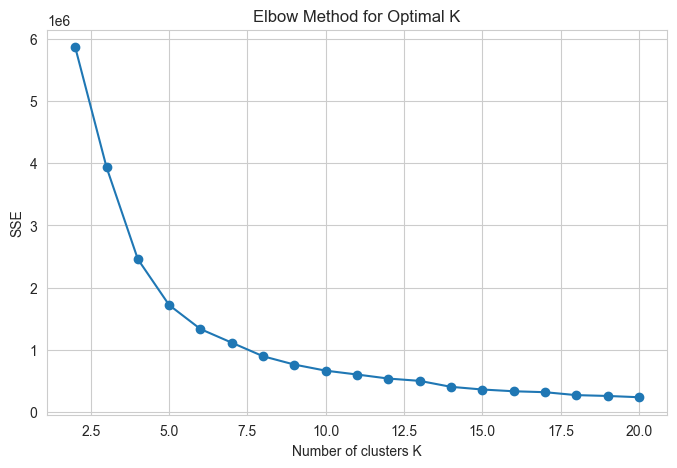

In [8]:
# K-means
features = user_profile[['review_count', 'average_stars', 'max_stars', 'min_stars', 'unique_business_count']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

sse = []
K_range = range(2, 21)  # K 从 2 到 20
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)  # inertia_ 就是 SSE

plt.figure(figsize=(8,5))
plt.plot(K_range, sse, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal K')
plt.show()

In [9]:
# Apply K-means
kmeans = KMeans(n_clusters=5, random_state=42)  # 选择3个集群
user_profile['cluster'] = kmeans.fit_predict(scaled_features)

# Save the model and scaler
joblib.dump(kmeans, 'kmeans_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save user clustering results
user_profile.to_csv('user_profile_with_clusters.csv', index=False)

/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/yarusu/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul
  current_pot = closest_

In [10]:
# Load the trained model and scaler
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')
user_profile = pd.read_csv('user_profile_with_clusters.csv')

# Recommend businesses based on clustering
def recommend_business(user_id):
    # Get the user’s cluster
    user_cluster = user_profile[user_profile['user_id'] == user_id]['cluster'].values[0]

    # Find similar users in the same cluster
    cluster_users = user_profile[user_profile['cluster'] == user_cluster]['user_id']

    # Recommend businesses that are frequently reviewed by other users in the cluster
    recommended_businesses = review_core[review_core['user_id'].isin(cluster_users)]['business_id'].value_counts().head(5)

    return recommended_businesses.index.tolist()

# Example: recommend businesses for a specific user
sample_user_id = user_profile['user_id'].iloc[3]
recommended_businesses = recommend_business(sample_user_id)

print(f"Recommended businesses for user {sample_user_id}: {recommended_businesses}")

Recommended businesses for user ---fa6ZK37T9NjkGKI4oSg: ['wz8ZPfySQczcPgSyd33-HQ', 've_-rPlEGPClytyJtY55Vw', '1fy9fS3UH2k4TfQcryNKkA', 'ONuqtwn8euUIWumg3U_4DQ', 'IkY2ticzHEn4QFn8hQLSWg']
